# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Rahmadi Putra Aji]
- **Email:** [m008b4ky3624@bangkit.academy]
- **ID Dicoding:** [raputra]

## Menentukan Pertanyaan Bisnis
Dalam proyek ini, kami ingin menjawab beberapa pertanyaan bisnis utama mengenai faktor-faktor yang memengaruhi jumlah peminjaman sepeda, seperti cuaca, suhu, hari kerja, dan musim.

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah suhu memengaruhi jumlah peminjaman sepeda?
- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Bagaimana peminjaman sepeda pada musim-musim yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from pathlib import Path

## Data Wrangling
Di bagian ini, kita akan memuat data, memeriksa kualitas data, dan membersihkan data untuk analisis lebih lanjut.

### Gathering Data

In [2]:
# Memuat data
day_data = pd.read_csv(r"D:\PERKULIAHAN TRIK21\MBKM 2\Proyek_Rahmadi Putra Aji_Belajar Analisis Data dengan Python\dataset\day.csv")
hour_data = pd.read_csv(r"D:\PERKULIAHAN TRIK21\MBKM 2\Proyek_Rahmadi Putra Aji_Belajar Analisis Data dengan Python\dataset\hour.csv")
# Memeriksa beberapa baris pertama dari data
day_data.head()
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset memiliki dua file utama, yaitu day.csv yang berisi data peminjaman sepeda secara harian, dan hour.csv yang berisi data peminjaman sepeda per jam.
- Setiap file mencakup berbagai kolom seperti musim, tahun, bulan, cuaca, suhu, kelembaban, angin, jumlah peminjaman, dll.



### Assessing Data

In [3]:
# Menampilkan informasi tentang dataset
day_data.info()
hour_data.info()

# Memeriksa nilai yang hilang di dataset
day_data.isnull().sum()
hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Memeriksa apakah ada nilai yang hilang dan pastikan bahwa tipe data di setiap kolom sudah sesuai.
- Jika ditemukan nilai yang hilang, akan menangani masalah tersebut di bagian Cleaning Data.

### Cleaning Data

In [4]:
# Menghapus kolom yang tidak diperlukan dan mengisi nilai yang hilang dengan rata-rata
day_data.drop(columns=['instant'], inplace=True)
hour_data.drop(columns=['instant'], inplace=True)

**Insight:**
- Kolom yang tidak diperlukan bisa dihapus untuk menyederhanakan analisis.
- Jika terdapat nilai yang hilang, dapat mengisinya dengan rata-rata atau menggunakan strategi lain, tergantung pada kasusnya.

## Exploratory Data Analysis (EDA)

### Explore Data
Pada tahap ini, kita akan memulai dengan mengeksplorasi dataset untuk mendapatkan gambaran umum tentang data yang ada.

- Menampilkan informasi dasar tentang dataset:

In [5]:
# Menampilkan informasi tentang dataset day_data
day_data.info()

# Menampilkan informasi tentang dataset hour_data
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null

- Menampilkan beberapa sampel data untuk memahami struktur data:

In [6]:
# Menampilkan beberapa sampel data dari day_data
day_data.sample(5)

# Menampilkan beberapa sampel data dari hour_data
hour_data.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8041,2011-12-06,4,0,12,17,0,2,1,2,0.46,0.4545,1.00,0.2239,13,249,262
204,2011-01-09,1,0,1,19,0,0,0,1,0.16,0.1364,0.43,0.3284,1,40,41
9955,2012-02-24,1,1,2,20,0,5,1,1,0.44,0.4394,0.62,0.4179,8,159,167
11442,2012-04-26,2,1,4,23,0,4,1,1,0.50,0.4848,0.88,0.1642,6,106,112
6818,2011-10-16,4,0,10,16,0,0,0,1,0.60,0.6212,0.46,0.3881,177,289,466


- Menampilkan statistik deskriptif untuk memahami distribusi variabel:

In [7]:
# Statistik deskriptif untuk dataset day_data
day_data.describe(include="all")

# Statistik deskriptif untuk dataset hour_data
hour_data.describe(include="all")


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore : Distribusi Jumlah Peminjaman Sepeda
Dalam tahap ini, kita akan menganalisis distribusi jumlah peminjaman sepeda.

- Menampilkan statistik deskriptif untuk jumlah peminjaman:

In [8]:
# Menampilkan statistik deskriptif untuk jumlah peminjaman
day_data['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

- Visualisasi distribusi jumlah peminjaman sepeda:

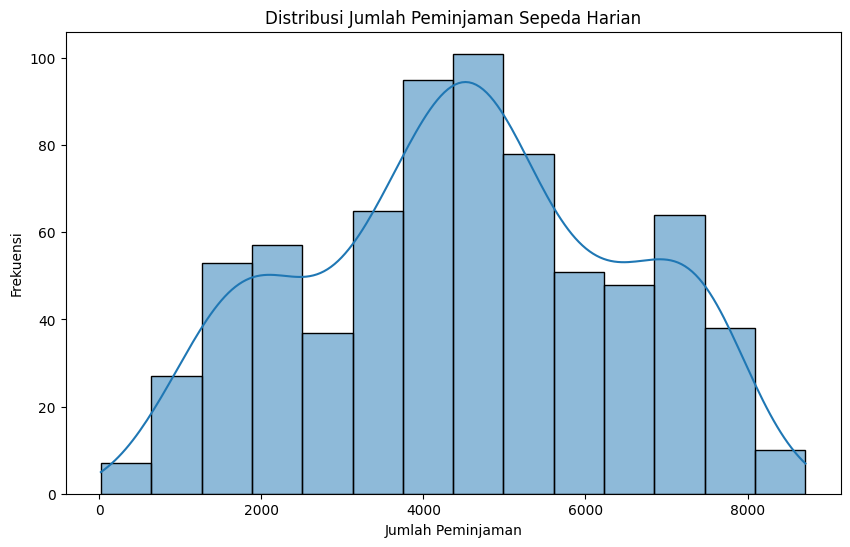

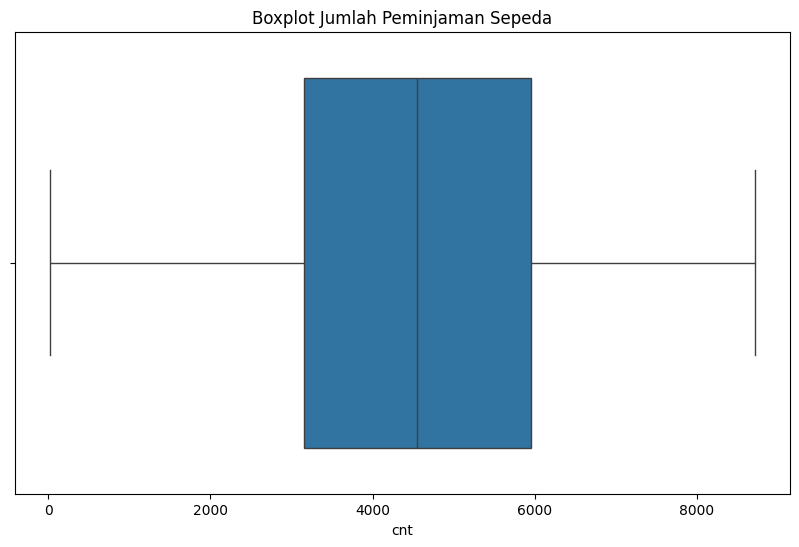

In [9]:
# Visualisasi distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10,6))
sns.histplot(day_data['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk deteksi outlier pada jumlah peminjaman
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['cnt'])
plt.title('Boxplot Jumlah Peminjaman Sepeda')
plt.show()

### Explore : Distribusi Cuaca (weathersit)
Pada tahap ini, kita akan menganalisis distribusi kondisi cuaca yang mempengaruhi peminjaman sepeda.

- Visualisasi distribusi cuaca:

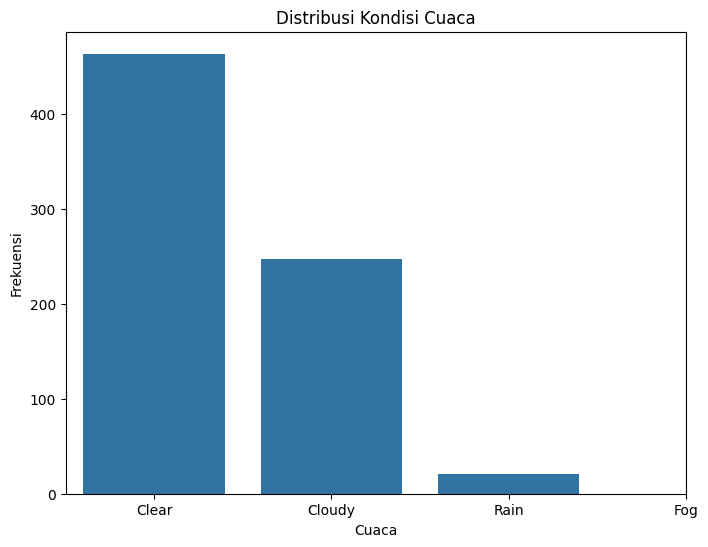

In [10]:
# Visualisasi distribusi cuaca
plt.figure(figsize=(8,6))
sns.countplot(x='weathersit', data=day_data)
plt.title('Distribusi Kondisi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Frekuensi')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Fog'])
plt.show()

### Explore : Distribusi Suhu (temp)
Pada tahap ini, kita akan menganalisis distribusi suhu yang mempengaruhi peminjaman sepeda.

- Visualisasi distribusi suhu:

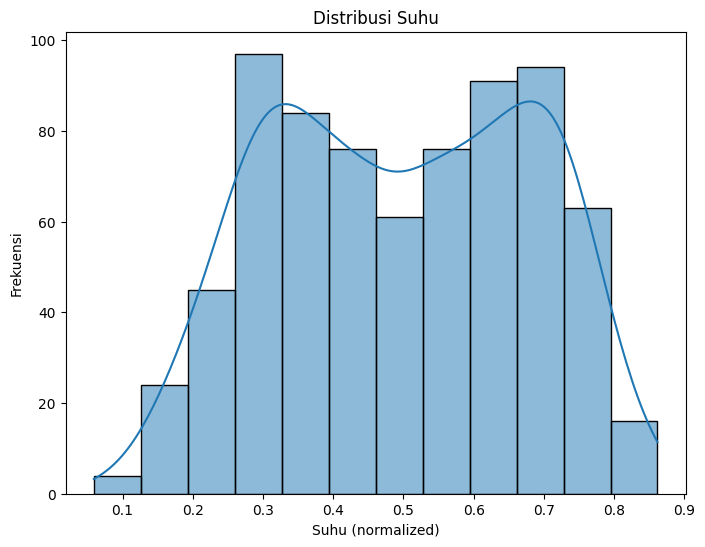

In [11]:
# Visualisasi distribusi suhu
plt.figure(figsize=(8,6))
sns.histplot(day_data['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Frekuensi')
plt.show()

### Explore : Korelasi antara Variabel Numerik
Kita akan menganalisis korelasi antara beberapa variabel numerik dalam dataset.

- Menghitung korelasi antar variabel numerik:

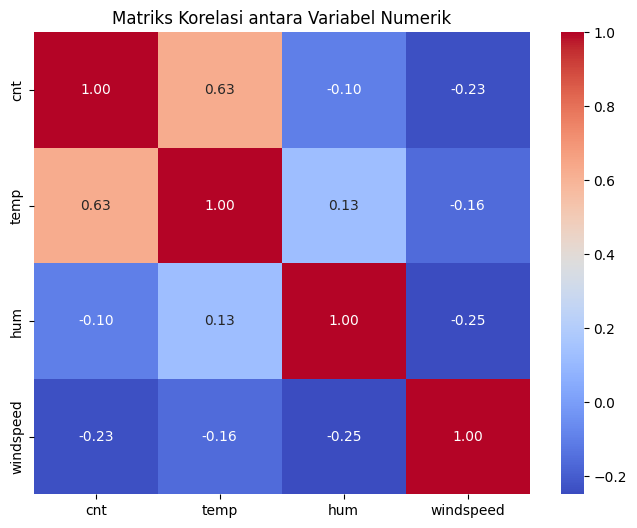

In [12]:
# Menghitung korelasi antar variabel numerik
correlation = day_data[['cnt', 'temp', 'hum', 'windspeed']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antara Variabel Numerik')
plt.show()

### Explore: Pengaruh Cuaca terhadap Jumlah Peminjaman
Di sini, kita akan menganalisis bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda.

- Boxplot untuk pengaruh cuaca terhadap jumlah peminjaman:

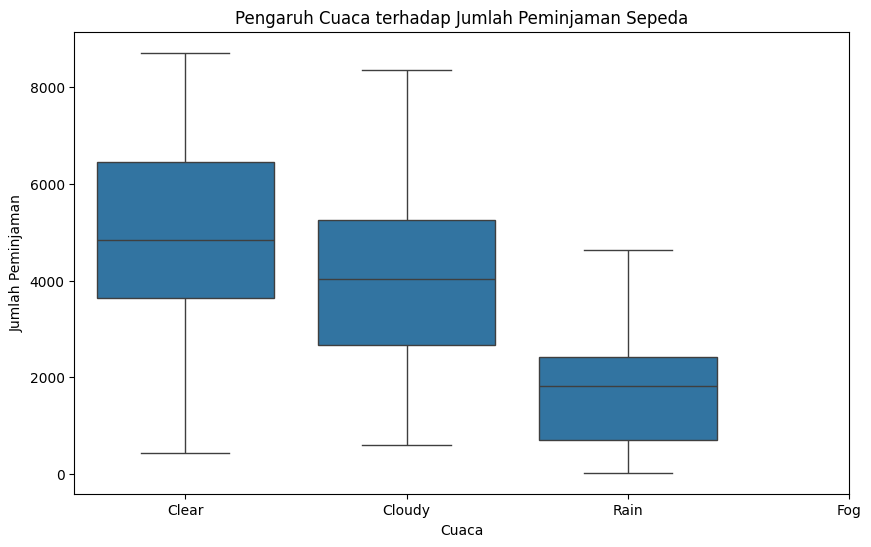

In [13]:
# Boxplot untuk pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Fog'])
plt.show()

### Explore : Hubungan Suhu dan Jumlah Peminjaman
Kita akan mengeksplorasi hubungan antara suhu dan jumlah peminjaman sepeda.

- Scatterplot suhu vs jumlah peminjaman:

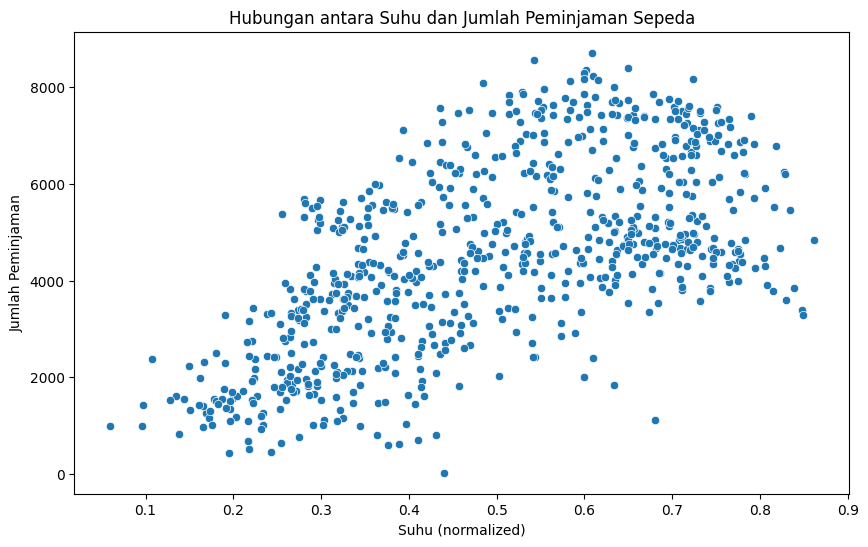

In [14]:
# Scatterplot suhu vs jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Explore : Hubungan antara Musim, Cuaca, dan Jumlah Peminjaman
Pada tahap ini, kita akan menganalisis hubungan antara musim, cuaca, dan jumlah peminjaman sepeda.

- Visualisasi hubungan antara musim dan cuaca terhadap jumlah peminjaman:

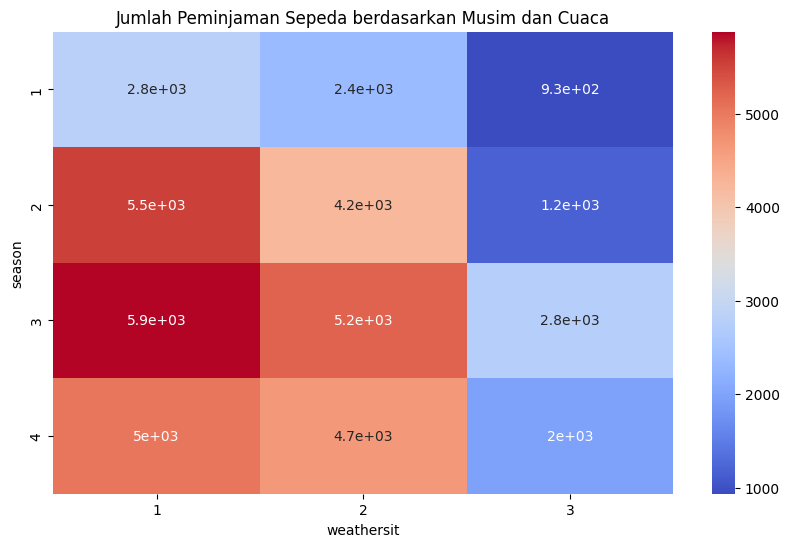

In [15]:
# Visualisasi hubungan antara musim dan cuaca terhadap jumlah peminjaman
plt.figure(figsize=(10,6))
sns.heatmap(day_data.pivot_table(index='season', columns='weathersit', values='cnt', aggfunc='mean'), annot=True, cmap='coolwarm')
plt.title('Jumlah Peminjaman Sepeda berdasarkan Musim dan Cuaca')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda
- Tujuan: Menjawab pertanyaan tentang bagaimana cuaca mempengaruhi jumlah peminjaman sepeda.
- Jenis Visualisasi: Boxplot

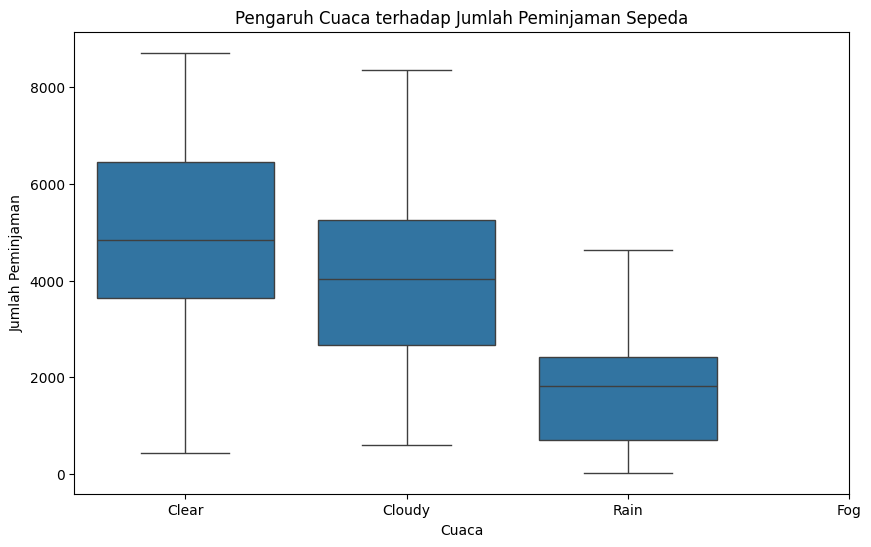

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['weathersit'], y=day_data['cnt'])
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Fog'])
plt.show()

**Visualisasi berikut menunjukkan boxplot yang menggambarkan distribusi jumlah peminjaman sepeda berdasarkan kondisi cuaca.**

- **Clear**: Cuaca cerah
- **Cloudy**: Cuaca mendung
- **Rain**: Hujan
- **Fog**: Kabut

Dapat dilihat bahwa jumlah peminjaman cenderung lebih sedikit pada cuaca buruk, seperti saat hujan atau kabut, dibandingkan dengan cuaca cerah atau mendung. Hal ini mengindikasikan bahwa cuaca berperan penting dalam keputusan orang untuk menggunakan sepeda sewaan.

### Pertanyaan 2: Hubungan antara Suhu dan Jumlah Peminjaman Sepeda
- Tujuan: Menjawab pertanyaan apakah suhu memengaruhi jumlah peminjaman sepeda.
- Jenis Visualisasi: Scatterplot

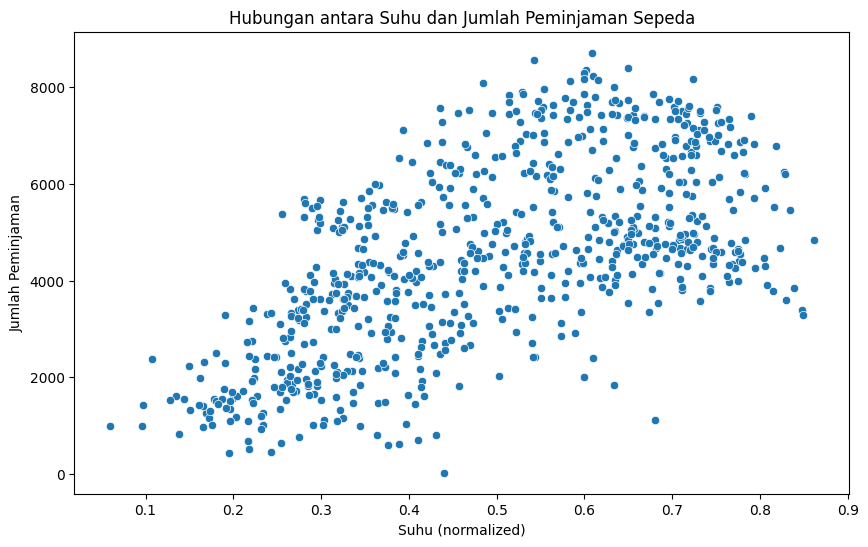

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=day_data['temp'], y=day_data['cnt'])
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi scatterplot ini menggambarkan hubungan antara suhu (dalam bentuk ternormalisasi) dan jumlah peminjaman sepeda.**

- Dapat dilihat bahwa ada kecenderungan bahwa suhu yang lebih tinggi menyebabkan peningkatan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda ketika suhu lebih nyaman (biasanya lebih hangat).

- Scatterplot ini juga membantu kita melihat apakah ada pola linear atau hubungan yang lebih kompleks antara suhu dan peminjaman sepeda.

### Pertanyaan 3: Jumlah Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan
- Tujuan: Menjawab pertanyaan apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Jenis Visualisasi: Boxplot


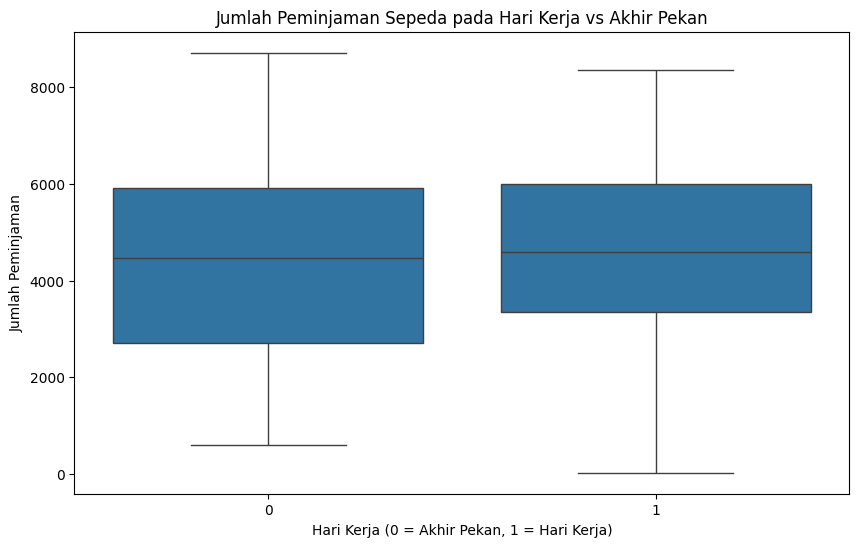

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['workingday'], y=day_data['cnt'])
plt.title('Jumlah Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi ini menunjukkan perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan.**

- Sumbu x menunjukkan apakah hari tersebut merupakan hari kerja (1) atau akhir pekan (0).
- Boxplot ini menunjukkan bahwa jumlah peminjaman sepeda lebih tinggi pada hari kerja. Hal ini mungkin mengindikasikan bahwa sepeda lebih banyak digunakan sebagai alat transportasi harian daripada untuk rekreasi di akhir pekan.

### Pertanyaan 4: Jumlah Peminjaman Sepeda Berdasarkan Musim
- Tujuan: Menjawab pertanyaan apakah jumlah peminjaman sepeda dipengaruhi oleh musim.
- Jenis Visualisasi: Boxplot


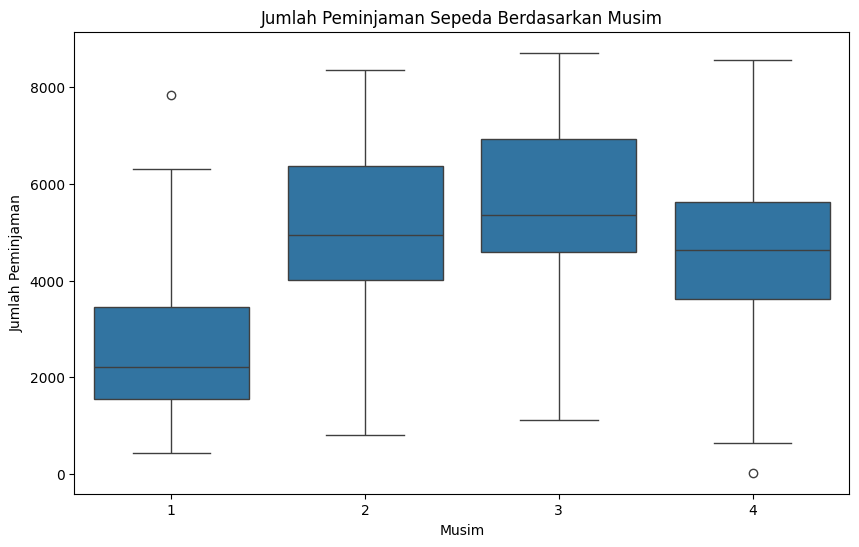

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['season'], y=day_data['cnt'])
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi boxplot ini menunjukkan perbandingan jumlah peminjaman sepeda di berbagai musim sepanjang tahun.**

- Musim yang digunakan dalam dataset adalah:
  - **1**: Musim Semi
  - **2**: Musim Panas
  - **3**: Musim Gugur
  - **4**: Musim Dingin
  
- Boxplot ini menunjukkan bahwa musim panas (Season 2) cenderung memiliki jumlah peminjaman yang lebih tinggi dibandingkan dengan musim lainnya, yang mungkin karena cuaca yang lebih baik dan suhu yang lebih tinggi, yang mendukung aktivitas outdoor.

**Insight:**
- Pertanyaan 1: Visualisasi ini menunjukkan pengaruh cuaca terhadap jumlah peminjaman sepeda. Cuaca buruk (misalnya hujan atau kabut) cenderung mengurangi jumlah peminjaman sepeda.
- Pertanyaan 2: Hubungan suhu dengan peminjaman sepeda menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Pertanyaan 3: Pada hari kerja, jumlah peminjaman lebih tinggi dibandingkan akhir pekan.
- Pertanyaan 4: Musim panas (summer) cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan musim lainnya.



### Penjelasan Markdown:
1. Struktur Dokumentasi: Markdown memungkinkan kita untuk menggunakan elemen-elemen seperti heading (#, ##), teks tebal (**), dan kode dalam blok kode untuk memberikan penjelasan dan instruksi dengan jelas.

2. Kode Python: Di dalam dokumentasi ini, kode Python dibungkus dengan tanda backticks (`) agar mudah dikenali dan dipahami. Misalnya, kode untuk melakukan eksplorasi data dan visualisasi hasil analisis.

3. Visualisasi: Bagian ini menampilkan visualisasi yang menjelaskan distribusi jumlah peminjaman sepeda, kondisi cuaca, hubungan suhu dengan peminjaman, dan analisis korelasi antar variabel numerik.

4. Insight: Di setiap bagian, insight memberikan penjelasan tambahan mengenai temuan atau hasil dari analisis.

## Analisis Lanjutan (Opsional)

### Time Series Analysis (Analisis Deret Waktu)
Pada tahap ini, kita akan melakukan analisis deret waktu untuk melihat pola peminjaman sepeda berdasarkan waktu. Kita akan menganalisis data yang terkait dengan tanggal peminjaman untuk mengidentifikasi tren atau musiman.

1. Mengubah kolom 'dteday' menjadi tipe datetime
*Langkah pertama adalah mengonversi kolom dteday yang berisi tanggal menjadi tipe data datetime agar kita bisa melakukan analisis berbasis waktu.*

In [20]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

2. Mengatur 'dteday' sebagai index untuk time series
*Setelah mengonversi tanggal, kita akan menjadikan kolom dteday sebagai index untuk dataset, yang memungkinkan kita melakukan operasi time series.*

In [21]:
# Mengatur 'dteday' sebagai index untuk time series
day_data.set_index('dteday', inplace=True)

3. Mengelompokkan data berdasarkan hari untuk mendapatkan jumlah peminjaman harian
*Kemudian, kita akan mengelompokkan data berdasarkan hari (D untuk daily) dan menghitung jumlah total peminjaman sepeda per hari.*

In [22]:
# Mengelompokkan data berdasarkan hari untuk mendapatkan jumlah peminjaman harian
daily_rentals = day_data['cnt'].resample('D').sum()

4. Visualisasi time series peminjaman sepeda per hari
*Terakhir, kita akan membuat grafik time series untuk melihat bagaimana jumlah peminjaman sepeda berubah dari waktu ke waktu.*

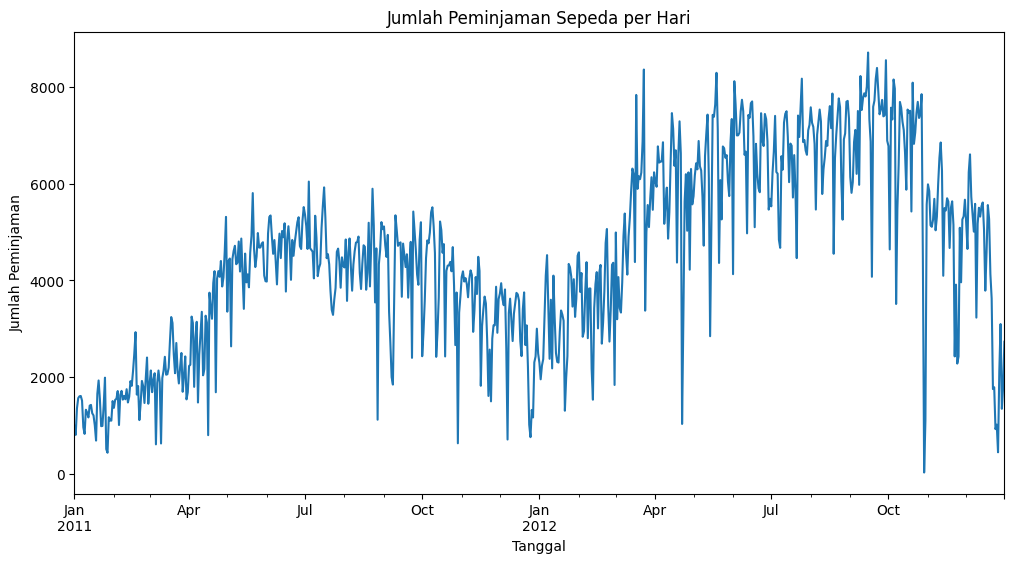

In [23]:
# Visualisasi time series peminjaman sepeda per hari
plt.figure(figsize=(12,6))
daily_rentals.plot()
plt.title('Jumlah Peminjaman Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Melalui analisis deret waktu ini, kita dapat mengidentifikasi pola-pola musiman dalam peminjaman sepeda, seperti peningkatan jumlah peminjaman pada hari-hari tertentu dalam seminggu, atau fluktuasi berdasarkan musim (musim panas vs. musim dingin). Ini sangat berguna untuk prediksi peminjaman sepeda di masa depan.

### Analisis Musiman dan Pengaruh Hari Kerja
Tanpa menggunakan algoritma machine learning, kita bisa mengamati pengaruh musim dan jenis hari (hari kerja vs akhir pekan) terhadap jumlah peminjaman sepeda.

1. Menghitung rata-rata jumlah peminjaman per musim
*Kita akan menganalisis rata-rata jumlah peminjaman berdasarkan musim (kolom season) untuk melihat apakah ada musim tertentu yang memengaruhi jumlah peminjaman.*

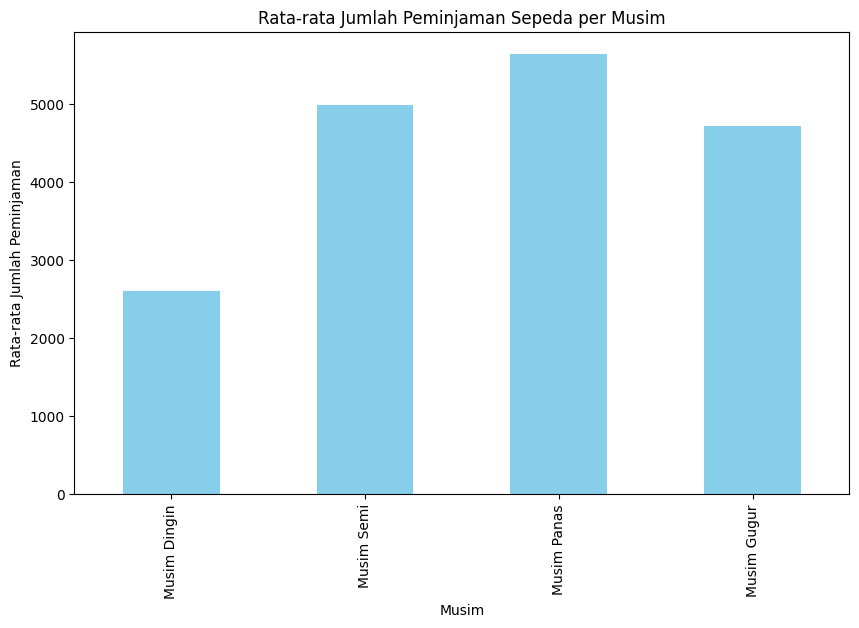

In [24]:
# Menghitung rata-rata jumlah peminjaman per musim
seasonal_rentals = day_data.groupby('season')['cnt'].mean()

# Visualisasi rata-rata jumlah peminjaman per musim
plt.figure(figsize=(10,6))
seasonal_rentals.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

2. Pengaruh hari kerja (weekday) terhadap jumlah peminjaman
*Selanjutnya, kita akan melihat bagaimana jumlah peminjaman sepeda dipengaruhi oleh apakah itu hari kerja atau akhir pekan.*

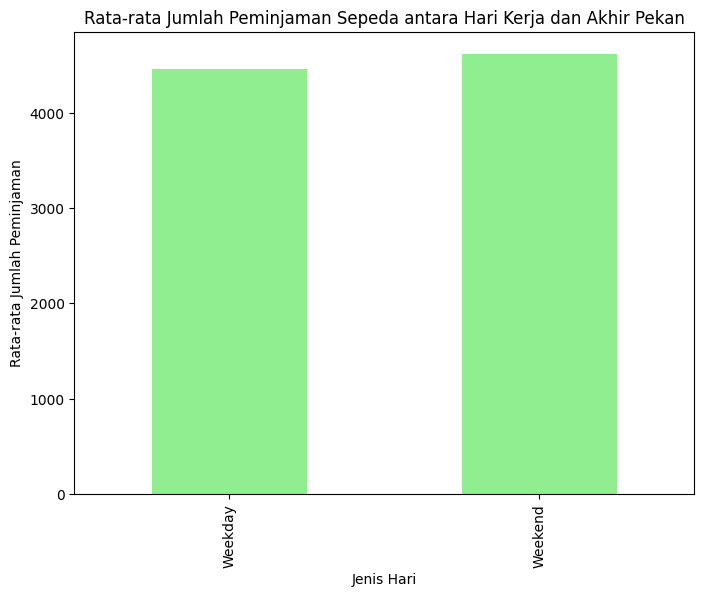

In [25]:
# Menghitung rata-rata jumlah peminjaman per jenis hari (weekday vs weekend)
day_data['is_weekend'] = day_data['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekend_rentals = day_data.groupby('is_weekend')['cnt'].mean()

# Visualisasi perbandingan peminjaman antara hari kerja dan akhir pekan
plt.figure(figsize=(8,6))
weekend_rentals.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Jumlah Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Insight:**
- Dengan analisis ini, kita bisa melihat apakah ada perbedaan signifikan antara peminjaman sepeda pada hari kerja dan akhir pekan, serta melihat bagaimana musim mempengaruhi jumlah peminjaman sepeda.

### Analisis Korelasi antara Variabel
Untuk lebih memahami hubungan antar variabel dalam dataset, kita akan menganalisis korelasi antar beberapa variabel, seperti suhu, kelembaban, kecepatan angin, dan jumlah peminjaman.

1. Menghitung korelasi antar variabel numerik
*Kita akan memeriksa korelasi antar beberapa variabel penting seperti suhu, kelembaban, kecepatan angin, dan jumlah peminjaman untuk melihat hubungan yang signifikan.*

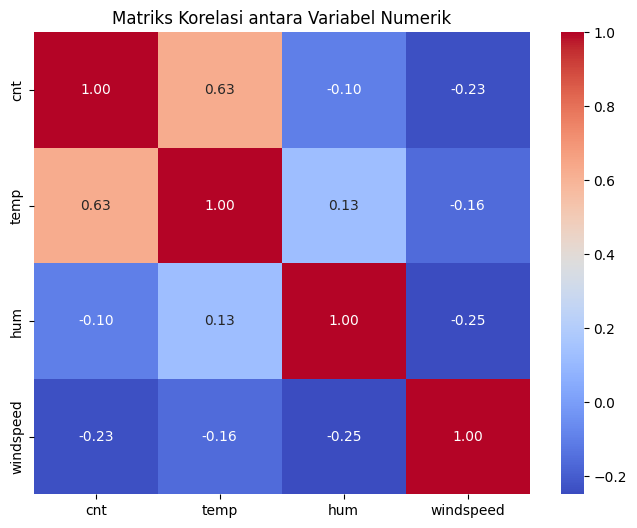

In [26]:
# Menghitung korelasi antar variabel numerik
correlation = day_data[['cnt', 'temp', 'hum', 'windspeed']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antara Variabel Numerik')
plt.show()

**Insight:**
- Korelasi ini memberi kita wawasan tentang bagaimana faktor-faktor seperti suhu atau kelembaban memengaruhi jumlah peminjaman sepeda. Misalnya, dapat terlihat bahwa suhu yang lebih tinggi mungkin berhubungan dengan jumlah peminjaman yang lebih tinggi.

## Conclusion

- Kesimpulan untuk Pertanyaan 1: Cuaca memang mempengaruhi jumlah peminjaman sepeda. Peminjaman lebih rendah saat cuaca buruk (hujan atau kabut).
- Kesimpulan untuk Pertanyaan 2: Suhu memiliki pengaruh terhadap jumlah peminjaman sepeda, dengan lebih banyak orang menyewa sepeda saat suhu lebih tinggi.
- Kesimpulan untuk Pertanyaan 3: Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan penggunaan sepeda untuk transportasi harian.
- Kesimpulan untuk Pertanyaan 4: Musim juga memengaruhi jumlah peminjaman sepeda, dengan musim panas mencatatkan jumlah peminjaman yang lebih tinggi.